In [1]:
import pandas as pd 

# Load Data


In [5]:
df = pd.read_csv("data.csv")
df.head()

,comment,type
0,يعطيكم الصحة,normal
1,عشي عندهما رجال,normal
2,نبيك مغتصب الاطفال المنيوك,aggressive
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal


In [6]:
df['aggressive'] = df['type'].apply(lambda x: 1 if x =='aggressive' else  0)
df.head()

,comment,type,aggressive
0,يعطيكم الصحة,normal,0
1,عشي عندهما رجال,normal,0
2,نبيك مغتصب الاطفال المنيوك,aggressive,1
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal,0
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal,0


# Train Model

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.comment,df.aggressive,test_size=0.2,random_state=1)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (3524,)
Shape of X_test:  (882,)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize data
vectorizer = CountVectorizer(binary=True)

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

#transform documents to document-term matrix
x_train_vec = vectorizer.transform(X_train)
x_test_vec = vectorizer.transform(X_test)

TypeError: 'tuple' object is not callable

# SVM

In [9]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)
     

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  86.39455782312925 %


# AdaBoost


In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
#Create AdaBoost model with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
n_estimators = 50
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)


In [23]:
# Train the model
ada_clf.fit(x_train_vec, y_train)

# Make predictions
y_pred = ada_clf.predict(x_test_vec)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


# Courbe ROC

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [29]:
# Assuming svm_clf is your trained SVM model and ada_clf is your trained AdaBoost model
svm_y_score = svm.decision_function(x_test_vec)
ada_y_score = ada_clf.decision_function(x_test_vec)

In [30]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_score)
svm_roc_auc = auc(svm_fpr, svm_tpr)

ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_y_score)
ada_roc_auc = auc(ada_fpr, ada_tpr)


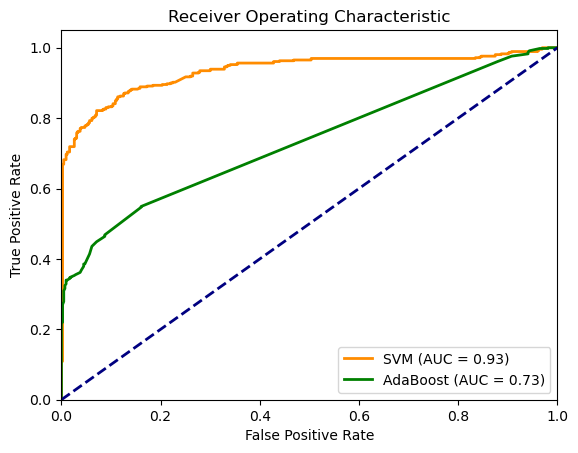

In [31]:
plt.figure()
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='green', lw=2, label='AdaBoost (AUC = %0.2f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()